# Extracting the principal components step by step

## Steps to calculate the PCA:
1.  Standardizing the data.
2.  Constructing the covariance Matrix
3.  Obtaing the eigenvectors of the covariance matrix
4.  Sortign the eigenvalues by decreasing order to rank the eigenvectors
5.  Select k eigenvectors
6.  Construct a projection Matrix
7.  Transform the input dataset

In [5]:
# Loading the wine dataset

import pandas as pd
df_wine = pd.read_csv('C:\\Users\\duart\\directory\\Machine-Learning\\datasets\\wine.csv')

In [6]:
# Spliting the dataset into training and test sets, and then standardizing the features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0, stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
# Calculate the covariance matrix
import numpy as np
cov_mat = np.cov(X_train_std.T)

# Calculate eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('Eigenvalues:\n', eigen_vals)

Eigenvalues:
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


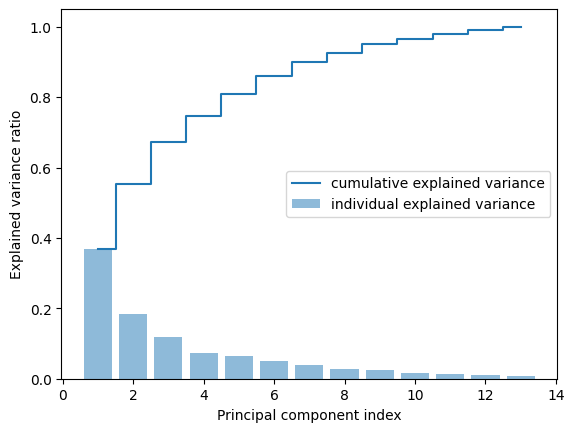

In [8]:
# Plot the explained variance
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [9]:
# Sorting the eigenvalues and corresponding eigenvectors
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) 
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Projection matrix
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                eigen_pairs[1][1][:, np.newaxis]))
print('Projection matrix:\n', w)

Projection matrix:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


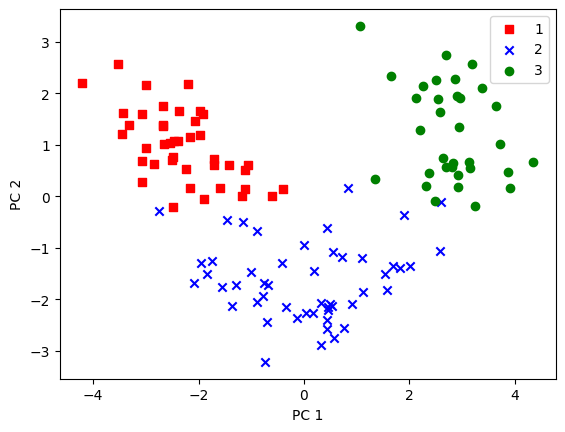

In [10]:
# Transforming the data onto the new feature subspace
X_train_pca = X_train_std.dot(w)

# Visualizing the transformed data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()

# Using Scikit-Learn

c:\Users\duart\directory\Machine-Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\duart\directory\Machine-Learning\plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


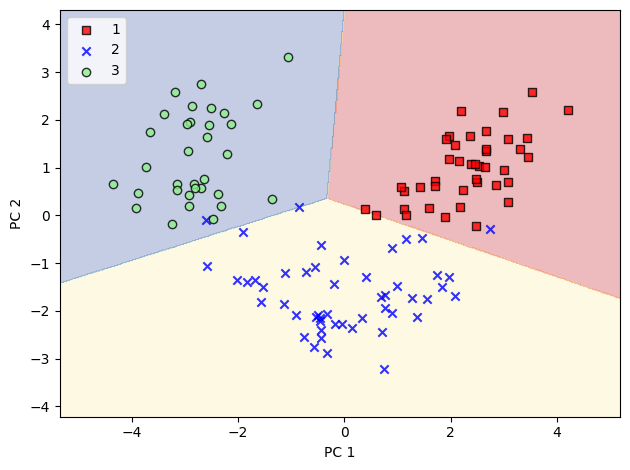

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import sys
sys.path.append('C:\\Users\\duart\\directory\\Machine-Learning')  # ou o caminho absoluto para o diretório raiz
import plot_decision_regions as pdr

# initialize PCA object and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                            solver='lbfgs',
                            random_state=1)

#dimensionality reduction using PCA
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fitting the logistic regression model using the transformed training set
lr.fit(X_train_pca, y_train)
pdr.plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()